In [4]:
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt

### Test for GPUs

In [3]:
print('GPUs: {}'.format( len( tf.config.list_physical_devices('GPU') ) ) )

GPUs: 2


### Reading the data from directories

In [5]:
w_dir = pathlib.Path('/home/antirrabia/Documents/DeepLearnin/DATASETS/CatsVsDogs/cats_vs_dogs_small/')

In [6]:
tr_d = image_dataset_from_directory( w_dir / 'train', 
                                   image_size=(180,180),
                                   batch_size=32)

va_d = image_dataset_from_directory( w_dir / 'validation', 
                                    image_size=(180,180),
                                    batch_size=32
                                   )

te_d = image_dataset_from_directory( w_dir / 'test',
                                    image_size=(180, 180), 
                                    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Model

In [7]:
inputs = keras.Input(shape=(180,180,3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

### Compile

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### summary

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

### Fitting

In [10]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint( filepath='cats_vs_dogs_basic.keras', 
                                   save_best_only=True,
                                   monitor='val_loss')
    ]

history = model.fit(
    tr_d,
    epochs=30,
    validation_data=va_d,
    callbacks=callbacks
    )

Epoch 1/30
63/63 [==============================] - 8s 64ms/step - loss: 0.8226 - accuracy: 0.4955 - val_loss: 0.6912 - val_accuracy: 0.5780
Epoch 2/30
63/63 [==============================] - 3s 54ms/step - loss: 0.6981 - accuracy: 0.5300 - val_loss: 0.6774 - val_accuracy: 0.5350
Epoch 3/30
63/63 [==============================] - 3s 53ms/step - loss: 0.6847 - accuracy: 0.5865 - val_loss: 0.6681 - val_accuracy: 0.6310
Epoch 4/30
63/63 [==============================] - 3s 53ms/step - loss: 0.6317 - accuracy: 0.6565 - val_loss: 0.6228 - val_accuracy: 0.6430
Epoch 5/30
63/63 [==============================] - 3s 51ms/step - loss: 0.5884 - accuracy: 0.6850 - val_loss: 0.6584 - val_accuracy: 0.6760
Epoch 6/30
63/63 [==============================] - 3s 52ms/step - loss: 0.5782 - accuracy: 0.7215 - val_loss: 0.5652 - val_accuracy: 0.7090
Epoch 7/30
63/63 [==============================] - 3s 52ms/step - loss: 0.4916 - accuracy: 0.7600 - val_loss: 0.8248 - val_accuracy: 0.5830
Epoch 8/30
63

### ploting the training

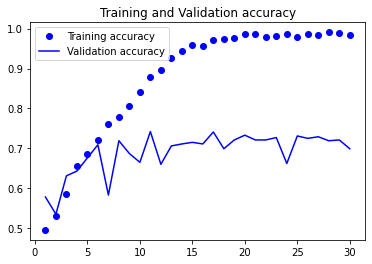

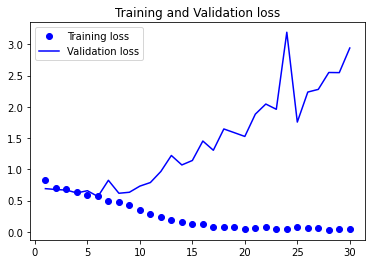

<Figure size 432x288 with 0 Axes>

In [12]:
# Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(), plt.figure();

# Loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(), plt.figure();

### Evaluating

In [13]:
te_model = keras.models.load_model('cats_vs_dogs_basic.keras')
te_loss, te_acc = te_model.evaluate(te_d)

print(f'Test accuracy: {te_acc:.3f}')

63/63 [==============================] - 1s 15ms/step - loss: 0.5708 - accuracy: 0.7075
Test accuracy: 0.707
